<img src="http://www.reeem.org/wp-content/uploads/2017/10/cropped-reeem-logo-transparent.png" width="300" style="float: left">
<img src="http://reiner-lemoine-institut.de//wp-content/uploads/2015/09/rlilogo.png" width="100" style="float: right">

# REEEM-DB - OSeMBE

__copyright__ 	= "© Reiner Lemoine Institut" <br>
__license__ 	= "GNU Affero General Public License Version 3 (AGPL-3.0)" <br>
__url__ 		= "https://www.gnu.org/licenses/agpl-3.0.en.html" <br>
__author__ 		= "Ludwig Hülk" <br>

# Import

In [7]:
# basic
import sys
import os
import getpass
import pandas as pd
import numpy as np
import json
import pathlib
from sqlalchemy import *
# plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objs as go
import plotly.offline as pltly
import colorlover as cl
import seaborn as sns
# notebook
from IPython.display import Image
from IPython.core.display import HTML 

pltly.init_notebook_mode(connected=True)
%matplotlib inline

version = 'v0.2.0'
project = 'REEEM'

# Database Connection

This function creates a database connection to the **reeem_db**.<br>
The default user is **reeem_vis**, a user that has only read rights.

This section establishes the database connection and asks for the **password**.<br>
The username can be changed in the corresponding function above.<br>
If you don't have a username or forgot your password please contact your database admins.

In [9]:
def reeem_session():
    """SQLAlchemy session object with valid connection to reeem database"""
    
    print('Please provide connection parameters to database:\n' +
              'Hit [Enter] to take defaults')
    host = '130.226.55.43' # input('host (default 130.226.55.43): ')
    port = '5432' # input('port (default 5432): ')
    database = 'reeem' # input("database name (default 'reeem'): ")
    user = 'reeem_vis' # input('user (default postgres): ')
    # password = input('password: ')
    password = getpass.getpass(prompt='password: ',
                                   stream=sys.stderr)
    con = create_engine(
            'postgresql://' + '%s:%s@%s:%s/%s' % (user,
                                                  password,
                                                  host,
                                                  port,
                                                  database)).connect()
    print('Password correct! Database connection established.')
    return con

con = reeem_session()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning:

The `stream` parameter of `getpass.getpass` will have no effect when using ipykernel



Please provide connection parameters to database:
Hit [Enter] to take defaults
password: ········
Password correct! Database connection established.


# Table Info

In [12]:
# Database
schema = 'model_draft'
table_in = 'reeem_osembe_input'
table_out = 'reeem_osembe_output'
folder = 'osembe'

pathlib.Path('data/'+folder).mkdir(parents=True, exist_ok=True) 
print("Database Schema:", schema +'\n'+ "Input table:", table_in +'\n'+ 
      "Output table:", table_out +'\n'+ "Created folder:", folder )

Database Schema: model_draft
Input table: reeem_osembe_input
Output table: reeem_osembe_output
Created folder: osembe


## Database Query

This section is used to query the database tables (**table_in** and **table_out**).<br>

In [8]:
# Number of entries in table
sql = text("""
    SELECT  'In' AS data, count(*) AS count
    FROM    {0}.{1}
    UNION ALL
    SELECT  'Out' AS data, count(*) AS count
    FROM    {0}.{2}""".format(schema, table_in, table_out))
df_num = pd.read_sql_query(sql, con)
df_num

,data,count
0,In,349092
1,Out,22630860


In [9]:
# Pathways
column = 'pathway' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_path = pd.read_sql_query(sql, con)
df_path

,data,pathway,count
0,Out,Base,581076
1,Out,C0T0E0,270036
2,In,C0T0E0,349092
3,Out,C0T0E1,270036
4,Out,C0T0E10,270036
5,Out,C0T0E11,270036
6,Out,C0T0E12,270036
7,Out,C0T0E13,270036
8,Out,C0T0E14,270036
9,Out,C0T0E15,270036


In [10]:
# Versions
column = 'pathway,version' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3}; """.format(schema, table_in, table_out, column))
df_ver = pd.read_sql_query(sql, con)
df_ver

,data,pathway,version,count
0,Out,Base,DataV1,581076
1,In,C0T0E0,DataV0,349092
2,Out,C0T0E0,DataV1,270036
3,Out,C0T0E1,DataV1,270036
4,Out,C0T0E10,DataV1,270036
5,Out,C0T0E11,DataV1,270036
6,Out,C0T0E12,DataV1,270036
7,Out,C0T0E13,DataV1,270036
8,Out,C0T0E14,DataV1,270036
9,Out,C0T0E15,DataV1,270036


In [11]:
# Years
column = 'year' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3} 
    ORDER BY {3} ; """.format(schema, table_in, table_out, column))
df_year = pd.read_sql_query(sql, con)
df_year

,data,year,count
0,In,2015,9697
1,Out,2015,628635
2,Out,2016,628635
3,In,2016,9697
4,Out,2017,628635
5,In,2017,9697
6,In,2018,9697
7,Out,2018,628635
8,In,2019,9697
9,Out,2019,628635


In [12]:
# Regions
column = 'region' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3}
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_reg = pd.read_sql_query(sql, con)
df_reg

,data,region,count
0,In,IE,10656
1,In,CH,14976
2,In,ES,11088
3,In,LT,10044
4,In,MT,6588
5,In,BE,22572
6,In,IT,11016
7,In,AT,20700
8,In,LU,9000
9,In,SK,10476


In [13]:
# Categories
column = 'category' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}; """.format(schema, table_in, table_out, column))
df_cat = pd.read_sql_query(sql, con)
df_cat

,data,category,count
0,In,None,5400
1,In,EmissionActivityRatio,6660
2,In,AnnualEmissionLimit,108
3,In,AvailabilityFactor,39996
4,In,DiscountRate,36
5,In,FixedCost,37656
6,In,Variable Cost,5436
7,In,TotalTechnologyAnnualActivityLowerLimit,972
8,In,TotalAnnualMaxCapacityInvestment,8532
9,In,SpecifiedAnnualDemand,1296


In [14]:
# Indicators
column = 'nid,category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator, nid; """.format(schema, table_in, table_out, column))
df_nind = pd.read_sql_query(sql, con)
df_nind.index.names = ['rid']
df_nind

,data,nid,category,indicator,count
rid,,,,,
0,In,1.0,AnnualEmissionLimit,CO2,108
1,In,1.0,AvailabilityFactor,Bio fuel ICE Heat and Power unit,108
2,In,4.0,AvailabilityFactor,Bio fuel ICE Heat and Power unit,1080
3,In,2.0,AvailabilityFactor,Biomass Combined Cycle,108
4,In,7.0,AvailabilityFactor,Biomass Combined Cycle,1080
5,In,3.0,AvailabilityFactor,Biomass Combined Heat and Power,108
6,In,8.0,AvailabilityFactor,Biomass Combined Heat and Power,1080
7,In,4.0,AvailabilityFactor,Biomass Steam Turbine,108
8,In,9.0,AvailabilityFactor,Biomass Steam Turbine,1044


In [15]:
# Indicators
column = 'category,indicator' # id, pathway, version, region, year, indicator, category, value, unit
sql = text("""
    SELECT  'In' AS data, {3}, count(*) AS count
    FROM    {0}.{1}
    GROUP BY {3} 
    UNION ALL 
    SELECT  'Out' AS data, {3}, count(*) AS count
    FROM    {0}.{2}
    GROUP BY {3}
    ORDER BY category, indicator; """.format(schema, table_in, table_out, column))
df_ind = pd.read_sql_query(sql, con)
df_ind.index.names = ['rid']
df_ind

,data,category,indicator,count
rid,,,,
0,In,AnnualEmissionLimit,CO2,108
1,In,AvailabilityFactor,Bio fuel ICE Heat and Power unit,1188
2,In,AvailabilityFactor,Biomass Combined Cycle,1188
3,In,AvailabilityFactor,Biomass Combined Heat and Power,1188
4,In,AvailabilityFactor,Biomass Steam Turbine,1152
5,In,AvailabilityFactor,Coal Combined Heat and Power,1116
6,In,AvailabilityFactor,Coal Steam Turbine large,1116
7,In,AvailabilityFactor,Coal Steam Turbine small,1116
8,In,AvailabilityFactor,Combined Heat and Power,108


In [16]:
# Write data as CSV file
csvname = 'data/{0}/reeem_{0}_indicators.csv'.format(folder)
df_ind.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

Data saved to file: data/osembe/reeem_osembe_indicators.csv


## Table metadata

Access the metadata from the database tables and write metadata string as JSON file.<br>

In [21]:
# Input Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_in))
meta_in = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_in)

# Save data to JSON file
fname_in = 'data/{0}/{1}_metadata.json'.format(folder, table_in)
with open(fname_in, 'w') as metafile:
    json.dump(json.loads(meta_in), metafile, indent=4)
    print("Data saved to file:", fname_in)

{
    "title": "REEEM OSeMBE Input",
    "description": "Input parameters: Service Demands, Fuel Prices, Potentials",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2060",
        "resolution": "1 year"},
    "sources": [
        {"name": "", "description": "", "url": "", "license": "", "copyright": ""},
        {"name": "", "description": "", "url": "", "license": "", "copyright": ""} ],
    "license": 
        {"id": "tba",
        "name": "tba",
        "version": "tba",
        "url": "tba",
        "instruction": "tba",
        "copyright": "tba"},
    "contributors": [
        {"name": "Ludee", "email": "none", "date": "2017-07-24", "comment": "Create table"},
        {"name": "Ludee", "email": "none", "date": "2017-11-14", "comment": "Update structure and metadata"},
        {"name": "Ludee", "email": 

In [22]:
# Output Metadata
sql = text("""SELECT obj_description('{0}.{1}'::regclass);""".format(schema, table_out))
meta_out = pd.read_sql_query(sql, con).loc[:,'obj_description'].iloc[0]
print(meta_out)

# Save data to JSON file
fname_out = 'data/{0}/{1}_metadata.json'.format(folder, table_out)
with open(fname_out, 'w') as metafile:
    json.dump(json.loads(meta_out), metafile, indent=4)
    print("Data saved to file:", fname_out)

{
    "title": "REEEM OSeMBE Output",
    "description": "Output parameters: ",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe (EU28+NO+CH)",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2050",
        "resolution": "1 year"},
    "sources": [
        {"name": "OSeMOSYS OSEMBE", "description": "The Open-Source energy Model Base for the European Union", "url": "http://www.osemosys.org/osembe.html", "license": "Apache License 2.0 (Apache-2.0)", "copyright": "tba"},
        {"name": "OSeMBE – An open-source engagement model", "description": "Model documentation", "url": "http://www.osemosys.org/uploads/1/8/5/0/18504136/osembe_documentation.pdf", "license": "none", "copyright": "none"},
        {"name": "OSeMBE input data", "description": "Data", "url": "http://www.osemosys.org/uploads/1/8/5/0/18504136/osembe_v1_20180821.zip", "license": "Open Data Commons At

# View 1: One indicator for one region in one pathway over time
## Database Query

This section can be used to query one specific **indicator** (_filter 1_) for one specific **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_1**) and can be printed.

In [36]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   category = 'Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar'
        AND indicator = 'Solar'
        AND region = 'EU+CH+NO'                       -- filter 2
        AND pathway = 'C0T0E0'                    -- filter 3
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                  -- filter 4
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_1 = pd.read_sql_query(sql, con)
print(df_1)

   pathway version    region  year  \
0   C0T0E0  DataV1  EU+CH+NO  2015   
1   C0T0E0  DataV1  EU+CH+NO  2016   
2   C0T0E0  DataV1  EU+CH+NO  2017   
3   C0T0E0  DataV1  EU+CH+NO  2018   
4   C0T0E0  DataV1  EU+CH+NO  2019   
5   C0T0E0  DataV1  EU+CH+NO  2020   
6   C0T0E0  DataV1  EU+CH+NO  2021   
7   C0T0E0  DataV1  EU+CH+NO  2022   
8   C0T0E0  DataV1  EU+CH+NO  2023   
9   C0T0E0  DataV1  EU+CH+NO  2024   
10  C0T0E0  DataV1  EU+CH+NO  2025   
11  C0T0E0  DataV1  EU+CH+NO  2026   
12  C0T0E0  DataV1  EU+CH+NO  2027   
13  C0T0E0  DataV1  EU+CH+NO  2028   
14  C0T0E0  DataV1  EU+CH+NO  2029   
15  C0T0E0  DataV1  EU+CH+NO  2030   
16  C0T0E0  DataV1  EU+CH+NO  2031   
17  C0T0E0  DataV1  EU+CH+NO  2032   
18  C0T0E0  DataV1  EU+CH+NO  2033   
19  C0T0E0  DataV1  EU+CH+NO  2034   
20  C0T0E0  DataV1  EU+CH+NO  2035   
21  C0T0E0  DataV1  EU+CH+NO  2036   
22  C0T0E0  DataV1  EU+CH+NO  2037   
23  C0T0E0  DataV1  EU+CH+NO  2038   
24  C0T0E0  DataV1  EU+CH+NO  2039   
25  C0T0E0  

## Metadata

The important information from the above select (**df_1**) is collected in a Dictionary (**info_dict_1**).

In [24]:
# Facts dict
info_dict_1 = {}
info_dict_1['Filename'] = ['{}_reeem_plot_1' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_1['Category'] = df_1.loc[:,'category'].unique()
info_dict_1['Indicator'] = df_1.loc[:,'indicator'].unique()
info_dict_1['Unit'] = df_1.loc[:,'unit'].unique()
info_dict_1['Pathway'] = df_1.loc[:,'pathway'].unique()
info_dict_1['Year'] = df_1.loc[:,'year'].unique().tolist()
info_dict_1['Region'] = df_1.loc[:,'region'].unique()
info_dict_1['Y-Axis'] = ['{} in {}'.format(*info_dict_1['Indicator'], *info_dict_1['Unit'])]
info_dict_1['Title'] = ['{} in {}'.format(*info_dict_1['Category'], *info_dict_1['Region'])]
info_dict_1['Metadata'] = meta_out

# Print facts
for x in info_dict_1:
    print(x,':',info_dict_1[x])

Filename : ['2019-05-14_reeem_plot_1']
Category : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar']
Indicator : ['Solar']
Unit : ['GW']
Pathway : ['C0T0E0']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['EU+CH+NO']
Y-Axis : ['Solar in GW']
Title : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar in EU+CH+NO']
Metadata : {
    "title": "REEEM OSeMBE Output",
    "description": "Output parameters: ",
    "language": [ "eng" ],
    "spatial": 
        {"location": "none",
        "extent": "Europe (EU28+NO+CH)",
        "resolution": "Country"},
    "temporal": 
        {"reference_date": "2015",
        "start": "2015",
        "end": "2050",
        "resolution": "1 year"},
    "sources": [
        {"name": "OS

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_1**. They can be exchanged with manual text.

C:\Nobackup\haukeh\programs\anaconda3\envs\reeem\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



(0, 228.85278576386867)

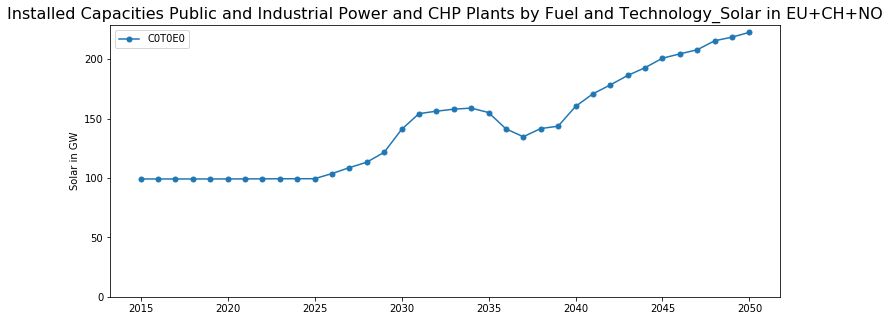

In [25]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in EU28', fontsize=16)  # Manual title
plt.title(*info_dict_1['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_1['Y-Axis'])                    # Label from info
plt.plot(df_1.loc[:,'year'], df_1.loc[:,'value'], 
         marker="o",  markersize=5)
plt.legend(df_1.loc[:,'pathway'].unique())
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.

In [35]:
# Interactive plot for one indicator and one pathway
name = df_1.loc[:,'pathway'].unique()
data = [go.Scatter(
    x = df_1.loc[:,'year'],
    y = df_1.loc[:,'value'],
    name = name[0])]

# Set layout
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_1['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_1['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.

In [ ]:
# Save plot as file
plotname = ('data/' + str({0}) + '/' + str({1}) +'.png').format(folder, *info_dict_1['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

In [ ]:
# Write facts to textfile
txtname = ('data/' + str({0}) + '/' + str({1}) +'.txt').format(folder, *info_dict_1['Filename'])
with open(txtname,'w') as tfile:
    for i in info_dict_1.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_1[i]]) + "\n")
tfile.close()
print("Facts saved to file:", txtname)

# Save data to CSV
csvname = ('data/' + str({0}) + '/' + str({1}) +'.csv').format(folder, *info_dict_1['Filename'])
df_1.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = ('data/' + str({0}) + '/' + str({1}) +'.png').format(folder, *info_dict_1['Filename'])
fig.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = ('data/' + str({0}) + '/' + str({1}) +'.html').format(folder, *info_dict_1['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# View 2: One indicator for one region in different pathways over time

## Database Query

This section can be used to query one specific **indicator** (_filter 1_) for one specific **region** (_filter 2_) from one database table (_table_).<br>
Indicators are identified by the **nid**.<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_2**) and can be printed.

In [75]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   category = 'Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar'
        AND indicator = 'Solar'
        AND region = 'EU+CH+NO'                   -- filter 2
        AND (pathway = 'C0T0E17' 
            OR pathway = 'C0T0E18')               -- filter 3
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_2 = pd.read_sql_query(sql, con)
print(df_2)

    pathway version    region  year  \
0   C0T0E17  DataV1  EU+CH+NO  2015   
1   C0T0E17  DataV1  EU+CH+NO  2016   
2   C0T0E17  DataV1  EU+CH+NO  2017   
3   C0T0E17  DataV1  EU+CH+NO  2018   
4   C0T0E17  DataV1  EU+CH+NO  2019   
5   C0T0E17  DataV1  EU+CH+NO  2020   
6   C0T0E17  DataV1  EU+CH+NO  2021   
7   C0T0E17  DataV1  EU+CH+NO  2022   
8   C0T0E17  DataV1  EU+CH+NO  2023   
9   C0T0E17  DataV1  EU+CH+NO  2024   
10  C0T0E17  DataV1  EU+CH+NO  2025   
11  C0T0E17  DataV1  EU+CH+NO  2026   
12  C0T0E17  DataV1  EU+CH+NO  2027   
13  C0T0E17  DataV1  EU+CH+NO  2028   
14  C0T0E17  DataV1  EU+CH+NO  2029   
15  C0T0E17  DataV1  EU+CH+NO  2030   
16  C0T0E17  DataV1  EU+CH+NO  2031   
17  C0T0E17  DataV1  EU+CH+NO  2032   
18  C0T0E17  DataV1  EU+CH+NO  2033   
19  C0T0E17  DataV1  EU+CH+NO  2034   
20  C0T0E17  DataV1  EU+CH+NO  2035   
21  C0T0E17  DataV1  EU+CH+NO  2036   
22  C0T0E17  DataV1  EU+CH+NO  2037   
23  C0T0E17  DataV1  EU+CH+NO  2038   
24  C0T0E17  DataV1  EU+C

In [38]:
# Facts dict
info_dict_2 = {}
info_dict_2['Filename'] = ['{}_reeem_plot_2' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_2['Category'] = df_2.loc[:,'category'].unique()
info_dict_2['Indicator'] = df_2.loc[:,'indicator'].unique()
info_dict_2['Unit'] = df_2.loc[:,'unit'].unique()
info_dict_2['Pathway'] = df_2.loc[:,'pathway'].unique()
info_dict_2['Year'] = df_2.loc[:,'year'].unique().tolist()
info_dict_2['Region'] = df_2.loc[:,'region'].unique()
info_dict_2['Y-Axis'] = ['{} in {}'.format(*info_dict_2['Indicator'], *info_dict_2['Unit'])]
info_dict_2['Title'] = ['{} in {}'.format(*info_dict_2['Category'], *info_dict_2['Region'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
for x in info_dict_2:
    print(x,':',info_dict_2[x])

Filename : ['2019-05-15_reeem_plot_2']
Category : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar']
Indicator : ['Solar']
Unit : ['GW']
Pathway : ['C0T0E17' 'C0T0E18']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['EU+CH+NO']
Y-Axis : ['Solar in GW']
Title : ['Installed Capacities Public and Industrial Power and CHP Plants by Fuel and Technology_Solar in EU+CH+NO']


## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_2p**) and can be printed.

In [39]:
# Reshape dataframe
df_2p = df_2.pivot(index='year', columns='pathway',  values='value')
# print (df_2p)

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_2**. They can be exchanged with manual text.

C:\Nobackup\haukeh\programs\anaconda3\envs\reeem\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



(0, 275.88263001082277)

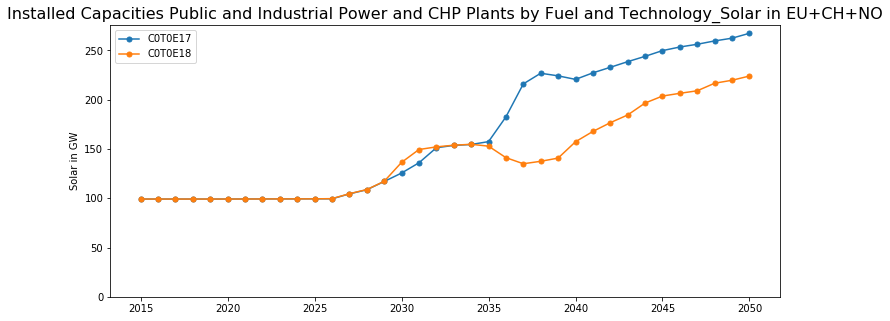

In [40]:
# Plot for one indicator and one pathway
fig_2 = plt.figure(figsize=(12, 5))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in EU28', fontsize=16)  # Manual title
plt.title(*info_dict_2['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_2['Y-Axis'])                    # Label from info
plt.plot(df_2p, 
         marker="o",  markersize=5)
plt.legend(df_2p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [41]:
# Iterate over pathways and add to data
pathways = df_2.loc[:,'pathway'].unique()
data = []
for pathway in pathways:
    data.append(go.Scatter(
        x = df_2.loc[df_2['pathway'] == pathway].loc[:,'year'],
        y = df_2.loc[df_2['pathway'] == pathway].loc[:,'value'],
        name = pathway))

# Set layout
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_2['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_2['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

## Interactive Plot 2

This is the manual interactive version.<br>
You can control the design using the [plotly documentation](https://plot.ly/python/line-and-scatter/#line-and-scatter-plots).

In [48]:
data = [go.Scatter(x=df_2.loc[df_2['pathway'] == 'Base'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'Base'].loc[:,'value'],
                   mode='lines+markers',
                   line=dict(color='black', dash='solid', width=2),
                   marker=dict(symbol=0, size=8, line=dict(width=2, color='black')),
                   name='Base'
                  ),
        go.Scatter(x=df_2.loc[df_2['pathway'] == 'HighRES'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'HighRES'].loc[:,'value'],
                   mode='lines+markers',
                   line=dict(color='green', dash='solid', width=2),
                   marker=dict(symbol=0, size=5, line=dict(width=2, color='black')),
                   name='HighRES'
                  ),
        go.Scatter(x=df_2.loc[df_2['pathway'] == 'StorageInnov'].loc[:,'year'],
                   y=df_2.loc[df_2['pathway'] == 'StorageInnov'].loc[:,'value'],
                   line=dict(color='red', dash='solid', width=2),
                   marker=dict(symbol=0, size=5, line=dict(width=2, color='black')),
                   name='StorageInnov'
                  )
       ]
layout = go.Layout(
    height=400, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_2['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_2['Y-Axis'])) )
ifig2 = go.Figure(data=data, layout=layout)
pltly.iplot(ifig2)

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>
The **plot** is saved as an image (png).<br>
The **interactive plot** is saved as a webpage (html). It will also open in a new tab of your browser.<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_2['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_2.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_2[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_2['Filename'])
df_2.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save pivot data to CSV
csvname = 'data/{}_pivot.csv' .format(*info_dict_2['Filename'])
df_2p.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Save plot as file
plotname = 'data/{}.png' .format(*info_dict_2['Filename'])
fig_2.savefig(plotname, bbox_inches='tight')
print("Plot saved to file:", plotname)

# Save interactive plot
htmlname = 'data/{}.html' .format(*info_dict_2['Filename'])
pltly.plot(ifig, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# Save interactive plot 2
htmlname = 'data/{}_2.html' .format(*info_dict_2['Filename'])
pltly.plot(ifig2, filename=htmlname)
print("Interactive plot saved to file:", htmlname)

# View 3: One indicator for all regions in one pathway over time

## Database Query

This section can be used to query one specific **indicator** for all regions from one database table (_table_).<br>
Indicators are identified by the **nid** (_filter 1_).<br>
Only **region** _EU28_ is excluded (_filter 2_).<br>
It is possible to select one specific **pathway** (_filter 3_) and one specific data **version** (_filter 4_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_3**) and can be printed.

In [56]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
        AND indicator = 'Sum'                     -- filter 5
    ORDER BY pathway, version, region, year, indicator;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
print(df_3)

     pathway version region  year  nid indicator                       field  \
0       Base  DataV1     AT  2015   59       Sum  Primary energy consumption   
1       Base  DataV1     AT  2016   59       Sum  Primary energy consumption   
2       Base  DataV1     AT  2017   59       Sum  Primary energy consumption   
3       Base  DataV1     AT  2018   59       Sum  Primary energy consumption   
4       Base  DataV1     AT  2019   59       Sum  Primary energy consumption   
5       Base  DataV1     AT  2020   59       Sum  Primary energy consumption   
6       Base  DataV1     AT  2021   59       Sum  Primary energy consumption   
7       Base  DataV1     AT  2022   59       Sum  Primary energy consumption   
8       Base  DataV1     AT  2023   59       Sum  Primary energy consumption   
9       Base  DataV1     AT  2024   59       Sum  Primary energy consumption   
10      Base  DataV1     AT  2025   59       Sum  Primary energy consumption   
11      Base  DataV1     AT  2026   59  

## Metadata

The important information from the above select (**df_3**) is collected in a Dictionary (**info_dict_3**).

In [57]:
# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
for x in info_dict_3:
    print(x,':',info_dict_3[x])

Filename : ['2019-05-15_reeem_plot_3']
Field : ['Primary energy consumption']
Indicator : ['Sum']
Unit : ['PJ']
Pathway : ['Base']
Year : [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
Region : ['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR' 'GR' 'HR'
 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI'
 'SK' 'UK']
Y-Axis : ['Sum in PJ']
Title : ['Sum in all regions']


## Stack data

This pivot function reorganises the data and makes each pathway a column. The year is used as the index.<br>
The result is saved to a new dataframe (**df_3p**) and can be printed.

In [58]:
# Reshape dataframe

df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

## Plot

This is a basic plot with [matplotlib](https://matplotlib.org/).<br>
The title and y-axis labels are taken from the **info_dict_3**. They can be exchanged with manual text.

C:\Nobackup\haukeh\programs\anaconda3\envs\reeem\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning:


The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.



(0, 1717.651664215779)

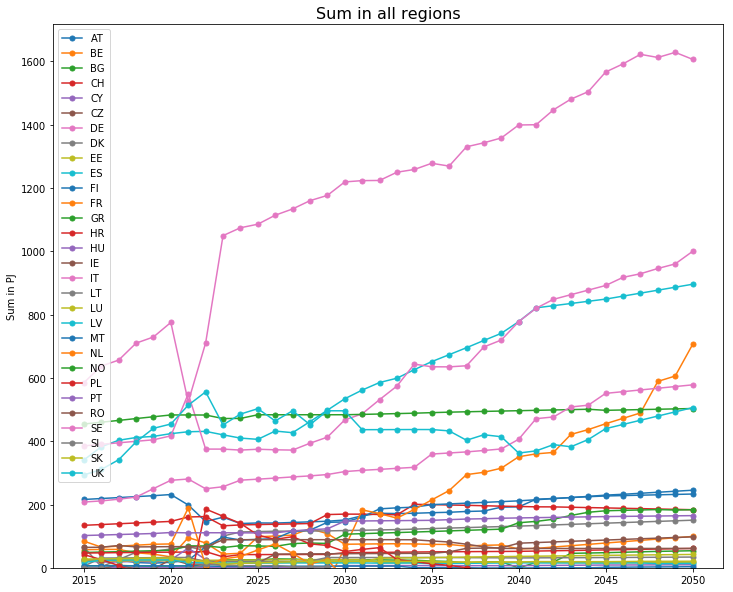

In [59]:
# Plot for one indicator and one pathway
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
# plt.title(r'CO2-Emissions in all regions', fontsize=16)  # Manual title
plt.title(*info_dict_3['Title'], fontsize=16)         # Title from info
# plt.ylabel(r'CO2-Emissions in Mt')                # Manual label
plt.ylabel(*info_dict_3['Y-Axis'])                    # Label from info
plt.plot(df_3p, 
         marker="o",  markersize=5)
plt.legend(df_3p)
ax.set_ylim(ymin=0)

## Interactive Plot

This is a basic interactive plot with [Plotly](https://plot.ly/python/).<br>
You can hover over the elements of the plot and observe the data.<br>
The different pathways can be switched on and off.

In [60]:
# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

# Combined

In [61]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, nid, indicator, field, value, unit  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE nid = 59                                -- filter 1
        AND region <> 'EU28'                      -- filter 2
        AND pathway = 'Base'                      -- filter 3
        AND version = 'DataV1'                    -- filter 4
    ORDER BY pathway, version, region, year;      -- sorting """)
df_3 = pd.read_sql_query(sql, con)
# print(df_3)

# Facts dict
info_dict_3 = {}
info_dict_3['Filename'] = ['{}_reeem_plot_3' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
info_dict_3['Field'] = df_3.loc[:,'field'].unique()
info_dict_3['Indicator'] = df_3.loc[:,'indicator'].unique()
info_dict_3['Unit'] = df_3.loc[:,'unit'].unique()
info_dict_3['Pathway'] = df_3.loc[:,'pathway'].unique()
info_dict_3['Year'] = df_3.loc[:,'year'].unique().tolist()
info_dict_3['Region'] = df_3.loc[:,'region'].unique()
info_dict_3['Y-Axis'] = ['{} in {}'.format(*info_dict_3['Indicator'], *info_dict_3['Unit'])]
info_dict_3['Title'] = ['{} in all regions'.format(*info_dict_3['Indicator'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
# for x in info_dict_3:
#     print(x,':',info_dict_3[x])

# Reshape dataframe
df_3p = df_3.pivot(index='year', columns='region',  values='value')
# print (df_3p)

# Iterate over pathways and add to data
regions = df_3.loc[:,'region'].unique()
data = []
for region in regions:
    data.append(go.Scatter(
        x = df_3.loc[df_3['region'] == region].loc[:,'year'],
        y = df_3.loc[df_3['region'] == region].loc[:,'value'],
        name = region))

# Set layout
layout = go.Layout(
    height=800, width = 800,
    #title='CO2-Emissions in EU28',
    title=''.join(info_dict_3['Title']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_3['Y-Axis'])) )
ifig = go.Figure(data=data, layout=layout)
pltly.iplot(ifig)

ValueError: Index contains duplicate entries, cannot reshape

# View 5: All indicators for all regions in one pathway over time

## Database Query

This section can be used to query all **indicator** for all regions from one database table (_table_).<br>
It is possible to select one specific **pathway** (_filter 1_) and one specific data **version** (_filter 2_).<br>
To querry additional coulmns from the database table add the names to the **SELECT** statement (_column_).<br>
The sortation is done by the **ORDER BY** (_sorting_).<br>
The result from the database is saved to a pandas.DataFrame (**df_5**) and can be printed.

In [54]:
# Database select (SQL)
sql = text("""
    SELECT  id, nid, pathway, framework, version, 
        region, year, field, indicator, value, 
        unit, aggregation, updated  -- column
    FROM    model_draft.reeem_osembe_output       -- table
    WHERE pathway = 'Base'                        -- filter 1
        AND version = 'DataV1'                    -- filter 2
    ORDER BY pathway, version, region, year;      -- sorting """)
df_5 = pd.read_sql_query(sql, con)
df_5.head(5)

,id,nid,pathway,framework,version,region,year,field,indicator,value,unit,aggregation,updated
0,229092,185,Base,FrameworkNA,DataV1,AT,2015,Electricity Production from Public and Industr...,Ocean,0.00000,TWh,True,2018-09-10 00:00:00+02:00
1,226536,104,Base,FrameworkNA,DataV1,AT,2015,Installed Capacities Public and Industrial Pow...,Heat and Power Unit,0.00000,MW,False,2018-09-10 00:00:00+02:00
2,227112,125,Base,FrameworkNA,DataV1,AT,2015,Installed Capacities Public and Industrial Pow...,Geothermal,0.00125,MW,True,2018-09-10 00:00:00+02:00
3,224700,53,Base,FrameworkNA,DataV1,AT,2015,Primary energy consumption,Natural gas,0.00000,PJ,False,2018-09-10 00:00:00+02:00
4,536856,119,Base,FrameworkNA,DataV1,AT,2015,None,Offshore,0.00000,GW,False,2018-11-27 00:00:00+01:00


## Metadata

The important information from the above select (**df_5**) is collected in a Dictionary (**info_dict_5**).

In [55]:
# Facts dict
info_dict_5 = {}
info_dict_5['Updated'] = [x.strftime("%Y-%m-%d") for x in df_5.loc[:,'updated'].unique()]
info_dict_5['Filename'] = ['{0}_{1}_OSeMBE_{2}_{3}_Output' .format(
    info_dict_5['Updated'][0],
    df_5.loc[:,'pathway'].unique()[0],
    df_5.loc[:,'framework'].unique()[0],
    df_5.loc[:,'version'].unique()[0])]
#info_dict_5['Category'] = df_5.loc[:,'category'].unique()
#info_dict_5['Indicator'] = df_5.loc[:,'indicator'].unique()
#info_dict_5['Unit'] = df_5.loc[:,'unit'].unique()
info_dict_5['Pathway'] = df_5.loc[:,'pathway'].unique()
info_dict_5['Version'] = df_5.loc[:,'version'].unique()
info_dict_5['Year'] = df_5.loc[:,'year'].unique().tolist()
info_dict_5['Region'] = df_5.loc[:,'region'].unique()
#info_dict_5['Y-Axis'] = ['{} in {}'.format(*info_dict_5['Indicator'], *info_dict_5['Unit'])]
#info_dict_5['Title'] = ['{} in all regions'.format(*info_dict_5['Category'])]
info_dict_5['Metadata'] = df_meta

# Print facts
for x in info_dict_5:
    print(x,':',info_dict_5[x])

NameError: name 'df_meta' is not defined

## Save results to files

The results are saved to cooresponding files in a folder named **data**.<br>
The **info_dict** is saved to a text file (txt).<br>
The **data** is saved to a table (csv).<br>

In [ ]:
# Write facts to textfile
filename = ('data/{}.txt').format(*info_dict_5['Filename'])
with open(filename,'w') as tfile:
    for i in info_dict_5.keys():
        tfile.write(i + ": " + ', '.join([str(x) for x in info_dict_5[i]]) + "\n")
tfile.close()
print("Facts saved to file:", filename)

# Save data to CSV
csvname = 'data/{}.csv' .format(*info_dict_5['Filename'])
df_5.to_csv(csvname, sep=';')
print("Data saved to file:", csvname)

# Logging

In [ ]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "nb_name = '" + nb.notebook_path + "'";
kernel.execute(command);

In [ ]:
print(nb_name)

In [ ]:
# Database select (SQL)
sql = text("""
    -- scenario log (project,version,io,schema_name,table_name,script_name,comment)
    SELECT scenario_log('REEEM','v0.3.0','view','{0}','{1}','{2}',' ');
    """.format(schema, table_out, nb_name))
df_2 = pd.read_sql_query(sql, con)
print(df_2)

# View 6: Stacked area diagram

## Database query

In [121]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   pathway = 'C0T0E0'
        AND (category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Coal'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Oil'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Natural gas / non renew.'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Nuclear'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Waste non renewable'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Biomass solid'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Biofuel liquid'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Hydro'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Wind'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Solar'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Geothermal'
            OR category = 'Electricity Production from Public and Industrial Power and CHP Plants by Fuel and Technology_Ocean')
        AND (indicator = 'Coal'
            OR indicator = 'Oil'
            OR indicator = 'Natural gas / non renew.'
            OR indicator = 'Nuclear'
            OR indicator = 'Waste non renewable'
            OR indicator = 'Biomass solid'
            OR indicator = 'Biofuel liquid'
            OR indicator = 'Hydro'
            OR indicator = 'Wind'
            OR indicator = 'Solar'
            OR indicator = 'Geothermal'
            OR indicator = 'Ocean')
        AND pathway = 'C0T0E0'            -- filter 2
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                    -- filter 3
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_6 = pd.read_sql_query(sql, con)
#print(df_6)

In [164]:
print(df_6.region.unique())

['RO' 'CH' 'PL' 'HU' 'CZ' 'BG' 'SI' 'ES' 'PT' 'SE' 'CY' 'AT' 'HR' 'LU'
 'SK' 'UK' 'DK' 'EE' 'FI' 'BE' 'DE' 'GR' 'EU+CH+NO' 'FR' 'LT' 'LV' 'IT'
 'MT' 'NL' 'IE' 'NO']


## Creat df for region

In [165]:
df_6_reg = df_6[df_6['region']=='EU+CH+NO']
print(df_6_reg)

      pathway version    region  year  \
96     C0T0E0  DataV1  EU+CH+NO  2015   
100    C0T0E0  DataV1  EU+CH+NO  2015   
103    C0T0E0  DataV1  EU+CH+NO  2015   
109    C0T0E0  DataV1  EU+CH+NO  2015   
112    C0T0E0  DataV1  EU+CH+NO  2015   
119    C0T0E0  DataV1  EU+CH+NO  2015   
123    C0T0E0  DataV1  EU+CH+NO  2015   
129    C0T0E0  DataV1  EU+CH+NO  2015   
136    C0T0E0  DataV1  EU+CH+NO  2015   
141    C0T0E0  DataV1  EU+CH+NO  2015   
145    C0T0E0  DataV1  EU+CH+NO  2015   
153    C0T0E0  DataV1  EU+CH+NO  2015   
631    C0T0E0  DataV1  EU+CH+NO  2016   
635    C0T0E0  DataV1  EU+CH+NO  2016   
638    C0T0E0  DataV1  EU+CH+NO  2016   
643    C0T0E0  DataV1  EU+CH+NO  2016   
646    C0T0E0  DataV1  EU+CH+NO  2016   
650    C0T0E0  DataV1  EU+CH+NO  2016   
652    C0T0E0  DataV1  EU+CH+NO  2016   
659    C0T0E0  DataV1  EU+CH+NO  2016   
661    C0T0E0  DataV1  EU+CH+NO  2016   
666    C0T0E0  DataV1  EU+CH+NO  2016   
670    C0T0E0  DataV1  EU+CH+NO  2016   
674    C0T0E0  D

## Stack data

In [166]:
# Reshape dataframe

df_6p = df_6_reg.pivot(index='year', columns='indicator',  values='value')
print(df_6p)

indicator  Biofuel liquid  Biomass solid         Coal  Geothermal  \
year                                                                
2015                  0.0      66.359626  2635.988068    3.482597   
2016                  0.0      66.482115  2705.449571    3.671444   
2017                  0.0      67.604377  2584.433340    3.861913   
2018                  0.0      79.362470  2542.236239    4.054024   
2019                  0.0      86.594742  2553.010354    4.247799   
2020                  0.0      85.929228  2584.595395    4.492453   
2021                  0.0      84.123095  3243.407183    4.668697   
2022                  0.0      83.641473  2181.386968    9.101662   
2023                  0.0     531.280943  1032.474779   23.661925   
2024                  0.0     702.370054   798.520673   24.601628   
2025                  0.0     774.955163   727.163377   29.359226   
2026                  0.0     844.111255   703.837586   32.924780   
2027                  0.0     880.

In [167]:
# Facts dict
info_dict_6 = {}
info_dict_6['Filename'] = ['{}_reeem_plot_6' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
#info_dict_6['Category'] = df_2.loc[:,'category'].unique()
#info_dict_6['Indicator'] = df_2.loc[:,'indicator'].unique()
info_dict_6['Unit'] = df_6.loc[:,'unit'].unique()
info_dict_6['Pathway'] = df_6.loc[:,'pathway'].unique()
info_dict_6['Year'] = df_6.loc[:,'year'].unique().tolist()
info_dict_6['Region'] = df_6_reg.loc[:,'region'].unique()
info_dict_6['Y-Axis'] = ['{}'.format(*info_dict_6['Unit'])]
#info_dict_6['Title'] = ['{} in {}'.format(*info_dict_6['Category'], *info_dict_6['Region'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
#for x in info_dict_6:
#    print(x,':',info_dict_6[x])

## Interactive Plot

In [168]:
x = df_6['year'].unique()

coal = dict(
    x=x,
    y=df_6p.loc[:,'Coal'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(0, 0, 0)'),
    stackgroup='one',
    name = 'Coal'
)
oil = dict(
    x=x,
    y=df_6p.loc[:,'Oil'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(121, 43, 41)'),
    stackgroup='one',
    name = 'HFO'
)
gas = dict(
    x=x,
    y=df_6p.loc[:,'Natural gas / non renew.'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(86, 108, 140)'),
    stackgroup='one',
    name = 'Natural gas'
)
nuclear = dict(
    x=x,
    y=df_6p.loc[:,'Nuclear'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(186, 28, 175)'),
    stackgroup='one',
    name = 'Nuclear'
)
waste = dict(
    x=x,
    y=df_6p.loc[:,'Waste non renewable'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(138, 171, 71)'),
    stackgroup='one',
    name = 'Waste'
)
biomass = dict(
    x=x,
    y=df_6p.loc[:,'Biomass solid'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(172, 199, 119)'),
    stackgroup='one',
    name = 'Biomass'
)
biofuel = dict(
    x=x,
    y=df_6p.loc[:,'Biofuel liquid'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(79, 98, 40)'),
    stackgroup='one',
    name = 'Biofuel'
)
hydro = dict(
    x=x,
    y=df_6p.loc[:,'Hydro'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(0, 139, 188)'),
    stackgroup='one',
    name = 'Hydro'
)
wind = dict(
    x=x,
    y=df_6p.loc[:,'Wind'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(143, 119, 173)'),
    stackgroup='one',
    name = 'Wind'
)
solar = dict(
    x=x,
    y=df_6p.loc[:,'Solar'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(230, 175, 0)'),
    stackgroup='one',
    name = 'Solar'
)
geo = dict(
    x=x,
    y=df_6p.loc[:,'Geothermal'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(192, 80, 77)'),
    stackgroup='one',
    name = 'Geothermal'
)
ocean = dict(
    x=x,
    y=df_6p.loc[:,'Ocean'],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5,
             color='rgb(22, 54, 92)'),
    stackgroup='one',
    name = 'Ocean'
)
# Set layout
layout_generation = go.Layout(
    #height=1000, width = 10000,
    #title='CO2-Emissions in EU28',
    title='Electricity generation in {}'.format(*info_dict_6['Region']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_6['Y-Axis'])) )

data = [coal, oil, gas, nuclear, waste, biomass, biofuel, hydro, wind, solar, geo, ocean]


In [182]:
fig = go.Figure(data=data, layout=layout_generation)
pltly.iplot(fig)

In [170]:
htmlname = 'data/{}.html' .format(*info_dict_6['Region'])
pltly.plot(fig, filename=htmlname)
#print("Interactive plot saved to file:", htmlname)

'data/EU+CH+NO.html'

In [134]:
print(regions)

['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'ES' 'FI' 'FR' 'GR' 'HR'
 'HU' 'IE' 'IT' 'LT' 'LU' 'LV' 'MT' 'NL' 'NO' 'PL' 'PT' 'RO' 'SE' 'SI'
 'SK' 'UK']


# Generation of graphs for all regions in for loop

In [159]:
for region in regions:
    #generate df for region
    df_6_reg = df_6[df_6['region']==region]
    # Reshape dataframe
    df_6p = df_6_reg.pivot(index='year', columns='indicator',  values='value')
    # Facts dict
    info_dict_6 = {}
    info_dict_6['Filename'] = ['{}_reeem_plot_6' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
    info_dict_6['Unit'] = df_6.loc[:,'unit'].unique()
    info_dict_6['Pathway'] = df_6.loc[:,'pathway'].unique()
    info_dict_6['Year'] = df_6.loc[:,'year'].unique().tolist()
    info_dict_6['Region'] = df_6_reg.loc[:,'region'].unique()
    info_dict_6['Y-Axis'] = ['{}'.format(*info_dict_6['Unit'])]
    # Create graph layout and data
    x = df_6['year'].unique()
    coal = dict(
        x=x,
        y=df_6p.loc[:,'Coal'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(0, 0, 0)'),
        stackgroup='one',
        name = 'Coal'
    )
    oil = dict(
        x=x,
        y=df_6p.loc[:,'Oil'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(121, 43, 41)'),
        stackgroup='one',
        name = 'HFO'
    )
    gas = dict(
        x=x,
        y=df_6p.loc[:,'Natural gas / non renew.'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(86, 108, 140)'),
        stackgroup='one',
        name = 'Natural gas'
    )
    nuclear = dict(
        x=x,
        y=df_6p.loc[:,'Nuclear'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(186, 28, 175)'),
        stackgroup='one',
        name = 'Nuclear'
    )
    waste = dict(
        x=x,
        y=df_6p.loc[:,'Waste non renewable'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(138, 171, 71)'),
        stackgroup='one',
        name = 'Waste'
    )
    biomass = dict(
        x=x,
        y=df_6p.loc[:,'Biomass solid'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(172, 199, 119)'),
        stackgroup='one',
        name = 'Biomass'
    )
    biofuel = dict(
        x=x,
        y=df_6p.loc[:,'Biofuel liquid'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(79, 98, 40)'),
        stackgroup='one',
        name = 'Biofuel'
    )
    hydro = dict(
        x=x,
        y=df_6p.loc[:,'Hydro'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(0, 139, 188)'),
        stackgroup='one',
        name = 'Hydro'
    )
    wind = dict(
        x=x,
        y=df_6p.loc[:,'Wind'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(143, 119, 173)'),
        stackgroup='one',
        name = 'Wind'
    )
    solar = dict(
        x=x,
        y=df_6p.loc[:,'Solar'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(230, 175, 0)'),
        stackgroup='one',
        name = 'Solar'
    )
    geo = dict(
        x=x,
        y=df_6p.loc[:,'Geothermal'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(192, 80, 77)'),
        stackgroup='one',
        name = 'Geothermal'
    )
    ocean = dict(
        x=x,
        y=df_6p.loc[:,'Ocean'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(22, 54, 92)'),
        stackgroup='one',
        name = 'Ocean'
    )
    # Set layout
    layout_generation = go.Layout(
        #height=1000, width = 10000,
        #title='CO2-Emissions in EU28',
        title='Electricity generation in {}'.format(*info_dict_6['Region']),
        # yaxis=dict(title='CO2-Emissions in Mt') )
        yaxis=dict(title=''.join(info_dict_6['Y-Axis'])) )

    data = [coal, oil, gas, nuclear, waste, biomass, biofuel, hydro, wind, solar, geo, ocean]
    #create the figure and plot it
    fig = go.Figure(data=data, layout=layout_generation)
    pltly.iplot(fig)
    #Save Graphs as html
    htmlname = 'data/{}.html' .format(*info_dict_6['Region'])
    pltly.plot(fig, filename=htmlname)

In [186]:
print(data)

[{'x': array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050], dtype=int64), 'y': year
2015    2635.988068
2016    2705.449571
2017    2584.433340
2018    2542.236239
2019    2553.010354
2020    2584.595395
2021    3243.407183
2022    2181.386968
2023    1032.474779
2024     798.520673
2025     727.163377
2026     703.837586
2027     658.515923
2028     601.477422
2029     597.604013
2030     552.842035
2031     549.223279
2032     547.748971
2033     520.000602
2034     513.300708
2035     497.144973
2036     495.665304
2037     476.566314
2038     425.126683
2039     385.455972
2040     260.157136
2041     221.607530
2042     165.095018
2043     145.164266
2044     104.293610
2045      23.813738
2046       1.760127
2047       0.000000
2048       0.000000
2049       0.000000
2050       0.000000
Name

# View 7: Trans-border electricity transmission

## Data base query

In [175]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                                             -- table
    WHERE   pathway = 'C0T0E0'                                  -- filter 1 
        AND category = 'Electricity Exchange - Net Imports'     -- filter 2
        AND pathway = 'C0T0E0'                                  -- filter 3
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                                  -- filter 4
    ORDER BY pathway, version, year;                            -- sorting """.format(schema, table_out))
df_7 = pd.read_sql_query(sql, con)
print(df_7)

      pathway version region  year                            category  \
0      C0T0E0  DataV1     MT  2015  Electricity Exchange - Net Imports   
1      C0T0E0  DataV1     BG  2015  Electricity Exchange - Net Imports   
2      C0T0E0  DataV1     SE  2015  Electricity Exchange - Net Imports   
3      C0T0E0  DataV1     IE  2015  Electricity Exchange - Net Imports   
4      C0T0E0  DataV1     BE  2015  Electricity Exchange - Net Imports   
5      C0T0E0  DataV1     FR  2015  Electricity Exchange - Net Imports   
6      C0T0E0  DataV1     NO  2015  Electricity Exchange - Net Imports   
7      C0T0E0  DataV1     SE  2015  Electricity Exchange - Net Imports   
8      C0T0E0  DataV1     BE  2015  Electricity Exchange - Net Imports   
9      C0T0E0  DataV1     BG  2015  Electricity Exchange - Net Imports   
10     C0T0E0  DataV1     FR  2015  Electricity Exchange - Net Imports   
11     C0T0E0  DataV1     BE  2015  Electricity Exchange - Net Imports   
12     C0T0E0  DataV1     BG  2015  El

## Metadata

In [262]:
# Facts dict
info_dict_7 = {}
info_dict_7['Filename'] = ['{}_reeem_plot_7' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
#info_dict_7['Category'] = df_2.loc[:,'category'].unique()
#info_dict_7['Indicator'] = df_2.loc[:,'indicator'].unique()
info_dict_7['Unit'] = df_7.loc[:,'unit'].unique()
info_dict_7['Pathway'] = df_7.loc[:,'pathway'].unique()
info_dict_7['Year'] = df_7.loc[:,'year'].unique().tolist()
info_dict_7['Region'] = df_7_reg.loc[:,'region'].unique()
info_dict_7['Y-Axis'] = ['{}'.format(*info_dict_7['Unit'])]
#info_dict_7['Title'] = ['{} in {}'.format(*info_dict_7['Category'], *info_dict_7['Region'])]
# ToDo: Select metadata string from database table and also add!

# Print facts
#for x in info_dict_7:
#    print(x,':',info_dict_7[x])

## Create df for region

In [289]:
df_7_reg = df_7[df_7['region']=='UK']
print(df_7_reg)

      pathway version region  year                            category  \
81     C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
90     C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
99     C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
108    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
119    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
125    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
137    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
144    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
153    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
161    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
169    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
180    C0T0E0  DataV1     UK  2015  Electricity Exchange - Net Imports   
187    C0T0E0  DataV1     UK  2015  El

## Stack data

In [290]:
# Reshape dataframe
df_7p = df_7_reg.pivot(index='year', columns='indicator',  values='value')
print(df_7p)

indicator   AT   BE   BG   CH   CY   CZ   DE   DK   EE   ES  ...         NL  \
year                                                         ...              
2015       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  29.959200   
2016       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2017       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2018       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2019       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2020       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2021       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2022       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  30.438547   
2023       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -30.438547   
2024       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -30.438547   
2025       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [291]:
# Create a df for netImports and one for netExports
def positives(value):
    return max(value, 0)
def negatives(value):
    return min(value, 0)
df_7p_pos = pd.DataFrame(index=info_dict_7['Year'],columns=regions)
df_7p_neg = pd.DataFrame(index=info_dict_7['Year'],columns=regions)
for region in regions:
    df_7p_pos[region] = df_7p[region].map(positives)
    df_7p_neg[region] = df_7p[region].map(negatives)
#print(df_7p_pos)
#print(df_7p_neg)

In [292]:
#Identify the countries that the selected country is connecte to
exchanger = []
for region in regions:
    if df_7p[region].sum()!=0:
        exchanger.append(region)
print(exchanger)

['FR', 'IE', 'NL', 'NO']


## Interactive Plot

In [293]:
x = df_7['year'].unique()

netImports = dict(
    AT_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'AT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 0, 0)'),
        stackgroup='one',
        name = 'AT_imp'
    ),
    BE_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'BE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(98, 67, 44)'),
        stackgroup='one',
        name = 'BE_imp'
    ),
    BG_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'BG'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(123, 96, 83)'),
        stackgroup='one',
        name = 'BG_imp'
    ),
    CH_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'CH'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(209, 58, 54)'),
        stackgroup='one',
        name = 'CH_imp'
    ),
    CY_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'CY'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(183, 66, 63)'),
        stackgroup='one',
        name = 'CY_imp'
    ),
    CZ_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'CZ'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(121, 43, 41)'),
        stackgroup='one',
        name = 'CZ_imp'
    ),
    DE_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'DE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(86, 108, 140)'),
        stackgroup='one',
        name = 'DE_imp'
    ),
    DK_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'DK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(129, 149, 177)'),
        stackgroup='one',
        name = 'DK_imp'
    ),
    EE_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'EE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(143, 119, 173)'),
        stackgroup='one',
        name = 'EE_imp'
    ),
    ES_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'ES'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(112, 48, 160)'),
        stackgroup='one',
        name = 'ES_imp'
    ),
    FI_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'FI'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(230, 175, 0)'),
        stackgroup='one',
        name = 'FI_imp'
    ),
    FR_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'FR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(234, 67, 0)'),
        stackgroup='one',
        name = 'FR_imp'
    ),
    GR_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'GR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(214, 163, 0)'),
        stackgroup='one',
        name = 'GR_imp'
    ),
    HR_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'HR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(188, 54, 0)'),
        stackgroup='one',
        name = 'HR_imp'
    ),
    HU_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'HU'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(230, 175, 0)'),
        stackgroup='one',
        name = 'HU_imp'
    ),
    IE_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'IE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(227, 131, 3)'),
        stackgroup='one',
        name = 'IE_imp'
    ),
    IT_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'IT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(193, 112, 3)'),
        stackgroup='one',
        name = 'IT_imp'
    ),
    LT_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'LT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(242, 98, 0)'),
        stackgroup='one',
        name = 'LT_imp'
    ),
    LU_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'LU'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 139, 188)'),
        stackgroup='one',
        name = 'LU_imp'
    ),
    LV_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'LV'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 176, 240)'),
        stackgroup='one',
        name = 'LV_imp'
    ),
    MT_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'MT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 139, 188)'),
        stackgroup='one',
        name = 'MT_imp'
    ),
    NL_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'NL'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 81, 142)'),
        stackgroup='one',
        name = 'NL_imp'
    ),
    NO_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'NO'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(22, 54, 92)'),
        stackgroup='one',
        name = 'NO_imp'
    ),
    PL_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'PL'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(192, 80, 77)'),
        stackgroup='one',
        name = 'PL_imp'
    ),
    PT_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'PT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(186, 28, 175)'),
        stackgroup='one',
        name = 'PT_imp'
    ),
    RO_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'RO'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(172, 199, 119)'),
        stackgroup='one',
        name = 'RO_imp'
    ),
    SE_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'SE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(138, 171, 71)'),
        stackgroup='one',
        name = 'SE_imp'
    ),
    SI_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'SI'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(79, 98, 40)'),
        stackgroup='one',
        name = 'SI_imp'
    ),
    SK_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'SK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(209, 58, 54)'),
        stackgroup='one',
        name = 'SK_imp'
    ),
    UK_pos = dict(
        x=x,
        y=df_7p_pos.loc[:,'UK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 176, 240)'),
        stackgroup='one',
        name = 'UK_imp'
    ),
    AT_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'AT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 0, 0)'),
        stackgroup='two',
        name = 'AT_exp'
    ),
    BE_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'BE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(98, 67, 44)'),
        stackgroup='two',
        name = 'BE_exp'
    ),
    BG_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'BG'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(123, 96, 83)'),
        stackgroup='two',
        name = 'BG_exp'
    ),
    CH_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'CH'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(209, 58, 54)'),
        stackgroup='two',
        name = 'CH_exp'
    ),
    CY_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'CY'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(183, 66, 63)'),
        stackgroup='two',
        name = 'CY_exp'
    ),
    CZ_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'CZ'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(121, 43, 41)'),
        stackgroup='two',
        name = 'CZ_exp'
    ),
    DE_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'DE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(86, 108, 140)'),
        stackgroup='two',
        name = 'DE_exp'
    ),
    DK_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'DK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(129, 149, 177)'),
        stackgroup='two',
        name = 'DK_exp'
    ),
    EE_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'EE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(143, 119, 173)'),
        stackgroup='two',
        name = 'EE_exp'
    ),
    ES_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'ES'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(112, 48, 160)'),
        stackgroup='two',
        name = 'ES_exp'
    ),
    FI_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'FI'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(230, 175, 0)'),
        stackgroup='two',
        name = 'FI_exp'
    ),
    FR_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'FR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(234, 67, 0)'),
        stackgroup='two',
        name = 'FR_exp'
    ),
    GR_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'GR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(214, 163, 0)'),
        stackgroup='two',
        name = 'GR_exp'
    ),
    HR_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'HR'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(188, 54, 0)'),
        stackgroup='two',
        name = 'HR_exp'
    ),
    HU_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'HU'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(230, 175, 0)'),
        stackgroup='two',
        name = 'HU_exp'
    ),
    IE_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'IE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(227, 131, 3)'),
        stackgroup='two',
        name = 'IE_exp'
    ),
    IT_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'IT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(193, 112, 3)'),
        stackgroup='two',
        name = 'IT_exp'
    ),
    LT_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'LT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(242, 98, 0)'),
        stackgroup='two',
        name = 'LT_exp'
    ),
    LU_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'LU'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 139, 188)'),
        stackgroup='two',
        name = 'LU_exp'
    ),
    LV_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'LV'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 176, 240)'),
        stackgroup='two',
        name = 'LV_exp'
    ),
    MT_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'MT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 139, 188)'),
        stackgroup='two',
        name = 'MT_exp'
    ),
    NL_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'NL'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 81, 142)'),
        stackgroup='two',
        name = 'NL_exp'
    ),
    NO_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'NO'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(22, 54, 92)'),
        stackgroup='two',
        name = 'NO_exp'
    ),
    PL_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'PL'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(192, 80, 77)'),
        stackgroup='two',
        name = 'PL_exp'
    ),
    PT_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'PT'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(186, 28, 175)'),
        stackgroup='two',
        name = 'PT_exp'
    ),
    RO_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'RO'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(172, 199, 119)'),
        stackgroup='two',
        name = 'RO_exp'
    ),
    SE_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'SE'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(138, 171, 71)'),
        stackgroup='two',
        name = 'SE_exp'
    ),
    SI_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'SI'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(79, 98, 40)'),
        stackgroup='two',
        name = 'SI_exp'
    ),
    SK_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'SK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(209, 58, 54)'),
        stackgroup='two',
        name = 'SK_exp'
    ),
    UK_neg = dict(
        x=x,
        y=df_7p_neg.loc[:,'UK'],
        hoverinfo='name',
        mode='lines',
        line=dict(width=0.5,
                     color='rgb(0, 176, 240)'),
        stackgroup='two',
        name = 'UK_exp'
    )
)  

In [294]:
# Set layout
layout_exchange = go.Layout(
    #height=1000, width = 10000,
    title='Net electricity import AT',
    #title='Electricity generation in {}'.format(*info_dict_7['Region']),
    # yaxis=dict(title='CO2-Emissions in Mt') )
    yaxis=dict(title=''.join(info_dict_7['Y-Axis'])) )

In [295]:
data = []
for country in exchanger:
    data.append(netImports['{}_pos'.format(country)])
    data.append(netImports['{}_neg'.format(country)])


In [296]:
exfig = go.Figure(data=data, layout=layout_exchange)
pltly.iplot(exfig)

In [205]:
htmlname = 'data/{}.html' .format(*info_dict_7['Region'])
pltly.plot(exfig, filename=htmlname)
#print("Interactive plot saved to file:", htmlname)

'data/AT.html'

## Plot trans-border transmission for all countries in a for loop

In [307]:
for region in regions:
    # Create country dataframe
    df_7_reg = df_7[df_7['region']==region]
    # Facts dict
    info_dict_7 = {}
    info_dict_7['Filename'] = ['{}_reeem_plot_7' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
    #info_dict_7['Category'] = df_2.loc[:,'category'].unique()
    #info_dict_7['Indicator'] = df_2.loc[:,'indicator'].unique()
    info_dict_7['Unit'] = df_7.loc[:,'unit'].unique()
    info_dict_7['Pathway'] = df_7.loc[:,'pathway'].unique()
    info_dict_7['Year'] = df_7.loc[:,'year'].unique().tolist()
    info_dict_7['Region'] = df_7_reg.loc[:,'region'].unique()
    info_dict_7['Y-Axis'] = ['{}'.format(*info_dict_7['Unit'])]
    # Reshape dataframe
    df_7p = df_7_reg.pivot(index='year', columns='indicator',  values='value')
    # Create a df for netImports and one for netExports
    def positives(value):
        return max(value, 0)
    def negatives(value):
        return min(value, 0)
    df_7p_pos = pd.DataFrame(index=info_dict_7['Year'],columns=regions)
    df_7p_neg = pd.DataFrame(index=info_dict_7['Year'],columns=regions)
    for region in regions:
        df_7p_pos[region] = df_7p[region].map(positives)
        df_7p_neg[region] = df_7p[region].map(negatives)
    #Identify the countries that the selected country is connected to
    exchanger = []
    for region in regions:
        if df_7p[region].sum()!=0:
            exchanger.append(region)
    x = df_7['year'].unique()

    netImports = dict(
        AT_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'AT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 0, 0)'),
            stackgroup='one',
            name = 'AT_imp'
        ),
        BE_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'BE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(98, 67, 44)'),
            stackgroup='one',
            name = 'BE_imp'
        ),
        BG_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'BG'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(123, 96, 83)'),
            stackgroup='one',
            name = 'BG_imp'
        ),
        CH_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'CH'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(209, 58, 54)'),
            stackgroup='one',
            name = 'CH_imp'
        ),
        CY_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'CY'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(183, 66, 63)'),
            stackgroup='one',
            name = 'CY_imp'
        ),
        CZ_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'CZ'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(121, 43, 41)'),
            stackgroup='one',
            name = 'CZ_imp'
        ),
        DE_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'DE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(86, 108, 140)'),
            stackgroup='one',
            name = 'DE_imp'
        ),
        DK_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'DK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(129, 149, 177)'),
            stackgroup='one',
            name = 'DK_imp'
        ),
        EE_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'EE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(143, 119, 173)'),
            stackgroup='one',
            name = 'EE_imp'
        ),
        ES_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'ES'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(112, 48, 160)'),
            stackgroup='one',
            name = 'ES_imp'
        ),
        FI_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'FI'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(230, 175, 0)'),
            stackgroup='one',
            name = 'FI_imp'
        ),
        FR_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'FR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(234, 67, 0)'),
            stackgroup='one',
            name = 'FR_imp'
        ),
        GR_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'GR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(214, 163, 0)'),
            stackgroup='one',
            name = 'GR_imp'
        ),
        HR_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'HR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(188, 54, 0)'),
            stackgroup='one',
            name = 'HR_imp'
        ),
        HU_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'HU'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(230, 175, 0)'),
            stackgroup='one',
            name = 'HU_imp'
        ),
        IE_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'IE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(227, 131, 3)'),
            stackgroup='one',
            name = 'IE_imp'
        ),
        IT_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'IT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(193, 112, 3)'),
            stackgroup='one',
            name = 'IT_imp'
        ),
        LT_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'LT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(242, 98, 0)'),
            stackgroup='one',
            name = 'LT_imp'
        ),
        LU_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'LU'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 139, 188)'),
            stackgroup='one',
            name = 'LU_imp'
        ),
        LV_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'LV'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 176, 240)'),
            stackgroup='one',
            name = 'LV_imp'
        ),
        MT_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'MT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 139, 188)'),
            stackgroup='one',
            name = 'MT_imp'
        ),
        NL_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'NL'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 81, 142)'),
            stackgroup='one',
            name = 'NL_imp'
        ),
        NO_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'NO'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(22, 54, 92)'),
            stackgroup='one',
            name = 'NO_imp'
        ),
        PL_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'PL'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(192, 80, 77)'),
            stackgroup='one',
            name = 'PL_imp'
        ),
        PT_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'PT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(186, 28, 175)'),
            stackgroup='one',
            name = 'PT_imp'
        ),
        RO_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'RO'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(172, 199, 119)'),
            stackgroup='one',
            name = 'RO_imp'
        ),
        SE_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'SE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(138, 171, 71)'),
            stackgroup='one',
            name = 'SE_imp'
        ),
        SI_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'SI'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(79, 98, 40)'),
            stackgroup='one',
            name = 'SI_imp'
        ),
        SK_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'SK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(209, 58, 54)'),
            stackgroup='one',
            name = 'SK_imp'
        ),
        UK_pos = dict(
            x=x,
            y=df_7p_pos.loc[:,'UK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 176, 240)'),
            stackgroup='one',
            name = 'UK_imp'
        ),
        AT_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'AT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 0, 0)'),
            stackgroup='two',
            name = 'AT_exp'
        ),
        BE_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'BE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(98, 67, 44)'),
            stackgroup='two',
            name = 'BE_exp'
        ),
        BG_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'BG'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(123, 96, 83)'),
            stackgroup='two',
            name = 'BG_exp'
        ),
        CH_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'CH'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(209, 58, 54)'),
            stackgroup='two',
            name = 'CH_exp'
        ),
        CY_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'CY'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(183, 66, 63)'),
            stackgroup='two',
            name = 'CY_exp'
        ),
        CZ_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'CZ'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(121, 43, 41)'),
            stackgroup='two',
            name = 'CZ_exp'
        ),
        DE_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'DE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(86, 108, 140)'),
            stackgroup='two',
            name = 'DE_exp'
        ),
        DK_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'DK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(129, 149, 177)'),
            stackgroup='two',
            name = 'DK_exp'
        ),
        EE_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'EE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(143, 119, 173)'),
            stackgroup='two',
            name = 'EE_exp'
        ),
        ES_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'ES'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(112, 48, 160)'),
            stackgroup='two',
            name = 'ES_exp'
        ),
        FI_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'FI'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(230, 175, 0)'),
            stackgroup='two',
            name = 'FI_exp'
        ),
        FR_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'FR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(234, 67, 0)'),
            stackgroup='two',
            name = 'FR_exp'
        ),
        GR_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'GR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(214, 163, 0)'),
            stackgroup='two',
            name = 'GR_exp'
        ),
        HR_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'HR'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(188, 54, 0)'),
            stackgroup='two',
            name = 'HR_exp'
        ),
        HU_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'HU'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(230, 175, 0)'),
            stackgroup='two',
            name = 'HU_exp'
        ),
        IE_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'IE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(227, 131, 3)'),
            stackgroup='two',
            name = 'IE_exp'
        ),
        IT_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'IT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(193, 112, 3)'),
            stackgroup='two',
            name = 'IT_exp'
        ),
        LT_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'LT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(242, 98, 0)'),
            stackgroup='two',
            name = 'LT_exp'
        ),
        LU_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'LU'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 139, 188)'),
            stackgroup='two',
            name = 'LU_exp'
        ),
        LV_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'LV'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 176, 240)'),
            stackgroup='two',
            name = 'LV_exp'
        ),
        MT_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'MT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 139, 188)'),
            stackgroup='two',
            name = 'MT_exp'
        ),
        NL_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'NL'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 81, 142)'),
            stackgroup='two',
            name = 'NL_exp'
        ),
        NO_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'NO'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(22, 54, 92)'),
            stackgroup='two',
            name = 'NO_exp'
        ),
        PL_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'PL'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(192, 80, 77)'),
            stackgroup='two',
            name = 'PL_exp'
        ),
        PT_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'PT'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(186, 28, 175)'),
            stackgroup='two',
            name = 'PT_exp'
        ),
        RO_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'RO'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(172, 199, 119)'),
            stackgroup='two',
            name = 'RO_exp'
        ),
        SE_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'SE'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(138, 171, 71)'),
            stackgroup='two',
            name = 'SE_exp'
        ),
        SI_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'SI'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(79, 98, 40)'),
            stackgroup='two',
            name = 'SI_exp'
        ),
        SK_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'SK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(209, 58, 54)'),
            stackgroup='two',
            name = 'SK_exp'
        ),
        UK_neg = dict(
            x=x,
            y=df_7p_neg.loc[:,'UK'],
            hoverinfo='name',
            mode='lines',
            line=dict(width=0.5,
                         color='rgb(0, 176, 240)'),
            stackgroup='two',
            name = 'UK_exp'
        )
    )
    # Set layout
    layout_exchange = go.Layout(
        #height=1000, width = 10000,
        title='Net electricity import {}'.format(*info_dict_7['Region']),
        #title='Electricity generation in {}'.format(*info_dict_7['Region']),
        # yaxis=dict(title='CO2-Emissions in Mt') )
        yaxis=dict(title=''.join(info_dict_7['Y-Axis'])) )
    # Set data for graph
    data = []
    for country in exchanger:
        data.append(netImports['{}_pos'.format(country)])
        data.append(netImports['{}_neg'.format(country)])
    exfig = go.Figure(data=data, layout=layout_exchange)
    htmlname = 'data/{}.html'.format(*info_dict_7['Region'])
    pltly.plot(exfig, filename=htmlname)

## Generation in 2015 and 2016

In [334]:
df_6_hist = df_6[df_6['year'].isin([2015, 2016])]
firsttwoyearGenDic = {}
for region in regions:
    df = pd.DataFrame()
    df = df_6_hist[df_6_hist['region']==region]
    firsttwoyearGenDic[region] = df.pivot(index='indicator', columns='year', values='value')
print(firsttwoyearGenDic['UK'])

#df_7p = df_7_reg.pivot(index='year', columns='indicator',  values='value')

year                            2015        2016
indicator                                       
Biofuel liquid              0.000000    0.000000
Biomass solid              32.789272   32.789682
Coal                      228.208352  217.421072
Geothermal                  0.000000    0.000000
Hydro                      19.971036   19.878926
Natural gas / non renew.  359.020000  361.429530
Nuclear                   281.962115  281.962115
Ocean                       0.019237    0.019814
Oil                         0.000000    0.000000
Solar                      31.112412   31.112412
Waste non renewable        25.663011   26.395727
Wind                      124.306092  141.161692


In [345]:
writer = pd.ExcelWriter('OSeMBE_IEA_comparison.xlsx', engine='xlsxwriter')
col_headers = pd.DataFrame(['Fuel', '2015', '2016'])

for c in regions:
    firsttwoyearGenDic[c].to_excel(writer, sheet_name=c, startrow=2,header=False,index=True)
    worksheet = writer.sheets[c]
    col_headers.to_excel(writer, sheet_name=c, header=False, index=False)
    
writer.save()

ModuleNotFoundError: No module named 'xlsxwriter'

# View 8: Fuel consumption graphs

## Database query

In [13]:
# Database select (SQL)
sql = text("""
    SELECT  pathway, version, region, year, category, indicator, value, unit  -- column
    FROM    {0}.{1}                               -- table
    WHERE   pathway = 'C0T0E0'
        AND category = 'Primary energy consumption of renewables'
        AND (indicator = 'Hydro, Ocean'
            OR indicator = 'Solar'
            OR indicator = 'Wind'
            OR indicator = 'Geothermal'
            OR indicator = 'Biomass'
            OR indicator = 'Biofuel')
        --AND framework = 'FrameworkV1'              
        AND version = 'DataV1'                    -- filter 3
    ORDER BY pathway, version, year;              -- sorting """.format(schema, table_out))
df_8 = pd.read_sql_query(sql, con)
print(df_8)

     pathway version    region  year  \
0     C0T0E0  DataV1        ES  2015   
1     C0T0E0  DataV1        AT  2015   
2     C0T0E0  DataV1        DE  2015   
3     C0T0E0  DataV1        FR  2015   
4     C0T0E0  DataV1        PT  2015   
5     C0T0E0  DataV1        HU  2015   
6     C0T0E0  DataV1        CZ  2015   
7     C0T0E0  DataV1        SK  2015   
8     C0T0E0  DataV1        GR  2015   
9     C0T0E0  DataV1        CZ  2015   
10    C0T0E0  DataV1        RO  2015   
11    C0T0E0  DataV1        UK  2015   
12    C0T0E0  DataV1        HU  2015   
13    C0T0E0  DataV1        GR  2015   
14    C0T0E0  DataV1        CZ  2015   
15    C0T0E0  DataV1        SK  2015   
16    C0T0E0  DataV1        UK  2015   
17    C0T0E0  DataV1        FR  2015   
18    C0T0E0  DataV1        DE  2015   
19    C0T0E0  DataV1        HU  2015   
20    C0T0E0  DataV1        PL  2015   
21    C0T0E0  DataV1        DE  2015   
22    C0T0E0  DataV1        FR  2015   
23    C0T0E0  DataV1        HR  2015   


In [14]:
regions = df_8['region'].unique()
print(regions)

['ES' 'AT' 'DE' 'FR' 'PT' 'HU' 'CZ' 'SK' 'GR' 'RO' 'UK' 'PL' 'HR' 'LT' 'LU'
 'EU+CH+NO' 'SE' 'NO' 'BE' 'IT' 'EE' 'NL' 'IE' 'DK' 'FI' 'BG' 'SI' 'MT'
 'CH' 'LV' 'CY']


## For loop to generate RE consumption plot for each country

In [24]:
for r in regions:
    df_8_reg = df_8[df_8['region']==r]
    #print(df_8_reg)
    df_8p = df_8_reg.pivot(index='year', columns='indicator',  values='value')
    #print(df_8p)

    # Facts dict
    info_dict_8 = {}
    info_dict_8['Filename'] = ['{}_reeem_plot_8' .format(pd.to_datetime('today').strftime("%Y-%m-%d"))]
    #info_dict_6['Category'] = df_2.loc[:,'category'].unique()
    #info_dict_6['Indicator'] = df_2.loc[:,'indicator'].unique()
    info_dict_8['Unit'] = df_8.loc[:,'unit'].unique()
    info_dict_8['Pathway'] = df_8.loc[:,'pathway'].unique()
    info_dict_8['Year'] = df_8.loc[:,'year'].unique().tolist()
    info_dict_8['Region'] = df_8_reg.loc[:,'region'].unique()
    info_dict_8['Y-Axis'] = ['{}'.format(*info_dict_8['Unit'])]
    
    ## Create dictionaries for graph

    x = df_8['year'].unique()

    biomass = dict(
        x=x,
        y=df_8p.loc[:,'Biomass'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(172, 199, 119)'),
        stackgroup='one',
        name = 'Biomass'
    )
    biofuel = dict(
        x=x,
        y=df_8p.loc[:,'Biofuel'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(79, 98, 40)'),
        stackgroup='one',
        name = 'Biofuel'
    )
    hydro = dict(
        x=x,
        y=df_8p.loc[:,'Hydro, Ocean'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(0, 139, 188)'),
        stackgroup='one',
        name = 'Hydro'
    )
    wind = dict(
        x=x,
        y=df_8p.loc[:,'Wind'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(143, 119, 173)'),
        stackgroup='one',
        name = 'Wind'
    )
    solar = dict(
        x=x,
        y=df_8p.loc[:,'Solar'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(230, 175, 0)'),
        stackgroup='one',
        name = 'Solar'
    )
    geo = dict(
        x=x,
        y=df_8p.loc[:,'Geothermal'],
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.5,
                 color='rgb(192, 80, 77)'),
        stackgroup='one',
        name = 'Geothermal'
    )
    # Set layout
    layout_consumption = go.Layout(
        #height=1000, width = 10000,
        #title='CO2-Emissions in EU28',
        title='Primary energy consumption of RE in {}'.format(*info_dict_8['Region']),
        # yaxis=dict(title='CO2-Emissions in Mt') )
        yaxis=dict(title=''.join(info_dict_8['Y-Axis'])) )

    data = [biomass, biofuel, hydro, wind, solar, geo]

    fig = go.Figure(data=data, layout=layout_consumption)
    #pltly.iplot(fig)

    htmlname = 'data/REconsumption/{}.html' .format(*info_dict_8['Region'])
    pltly.plot(fig, filename=htmlname)